In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [3]:
df = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [11]:
alpha=0.2

In [12]:
ses=SimpleExpSmoothing(df["Passengers"])


/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [13]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [14]:
df.index.freq="MS"

In [15]:
ses=SimpleExpSmoothing(df["Passengers"],initialization_method='legacy-heuristic')

In [18]:
res=ses.fit(smoothing_level=alpha,optimized=False)
res

In [19]:
res.predict(start=df.index[0],end=df.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.200000
1949-04-01    116.960000
1949-05-01    119.368000
                 ...    
1960-08-01    488.767616
1960-09-01    512.214093
1960-10-01    511.371274
1960-11-01    501.297019
1960-12-01    479.037615
Freq: MS, Length: 144, dtype: float64

In [20]:
df["SES"]=res.predict(start=df.index[0],end=df.index[-1])

In [21]:
np.allclose(df["SES"],res.fittedvalues)

True

<AxesSubplot:xlabel='Month'>

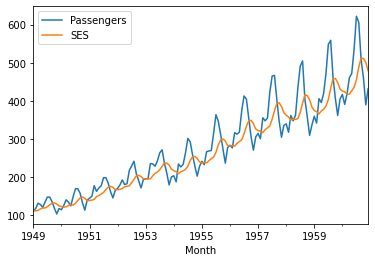

In [22]:
df.plot()

In [27]:
N_test = 12
train=df.iloc[:-N_test]
test=df.iloc[-N_test:]

,Passengers,SES
Month,,
1960-01-01,417,425.974608
1960-02-01,391,424.179686
1960-03-01,419,417.543749
1960-04-01,461,417.834999
1960-05-01,472,426.467999
1960-06-01,535,435.574399
1960-07-01,622,455.459520
1960-08-01,606,488.767616
1960-09-01,508,512.214093


In [30]:
ses=SimpleExpSmoothing(train["Passengers"],initialization_method='legacy-heuristic')
res=ses.fit()

In [31]:
train_idx=df.index <=train.index[-1]
test_idx=df.index >train.index[-1]

In [32]:
train_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [34]:
df.loc[train_idx,"SESFitted"]=res.fittedvalues
df.loc[test_idx,"SESFitted"]=res.forecast(N_test)

<AxesSubplot:xlabel='Month'>

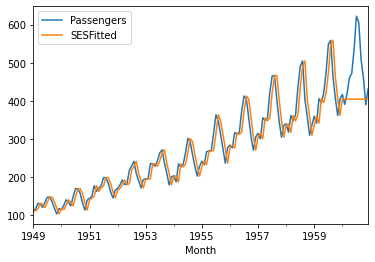

In [35]:
df[["Passengers","SESFitted"]].plot()

In [36]:
res.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}